In [104]:
import pandas as pd             # numpy arrays with spreadsheet-like funciton. SQL-like joins, built in plotting
import matplotlib.pyplot as plt # plotting
import seaborn as sns
import numpy as np              # for cleaning data (remove duplicates/outliers etc)

In [172]:
df = pd.read_csv("predictStarTypes.csv") # import data
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [178]:
df[df.isna().any(axis=1)]
# proves dataset has all non-null values
# df_clean = df.dropna() is for dropping all null values

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [72]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [164]:
# method for finding outliers:
def find_outliers_iqr(df, column):
    q1 = df[column].quantile(.25)
    q3 = df[column].quantile(.75)
    IQR = q3 - q1
    lower = q1 - 1.5 * IQR
    upper = q3 + 1.5 * IQR
    return df[(df[column] < lower) | (df[column] > upper)]

outliers_luminosity = find_outliers_iqr(df, "Luminosity(L/Lo)")
display(outliers_luminosity)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class,Log_Luminosity,Log_Temperature
53,3749,550000.0,1648.0,-8.050,5,Orange,M,5.740363,3.573915
101,40000,813000.0,14.0,-6.230,4,Blue,O,5.910091,4.602060
172,4287,630000.0,1315.0,-9.200,5,Orange,K,5.799341,3.632153
223,23440,537430.0,81.0,-5.975,4,Blue,O,5.730322,4.369958
226,9892,593900.0,80.0,-7.262,4,Blue,O,5.773713,3.995284
227,10930,783930.0,25.0,-6.224,4,Blue,O,5.894277,4.038620
229,21738,748890.0,92.0,-7.346,4,Blue,O,5.874418,4.337220
232,32489,648430.0,1948.5,-10.840,5,Blue,O,5.811863,4.511736
233,27739,849420.0,1252.0,-7.590,5,Blue-white,B,5.929122,4.443091
234,21904,748490.0,1130.0,-7.670,5,Blue-white,B,5.874186,4.340523


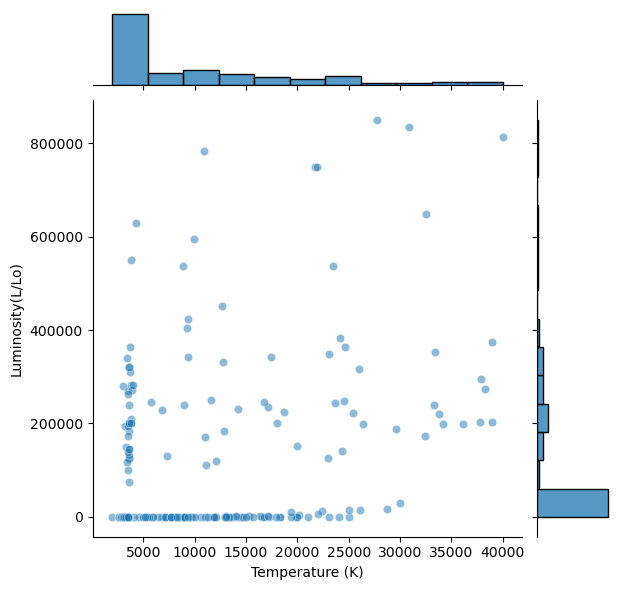

In [186]:
# EDA (Exploratory data analysis)
sns.jointplot(x="Temperature (K)", y="Luminosity(L/Lo)", data=df, alpha=0.5)   # concentration of points (alpha)

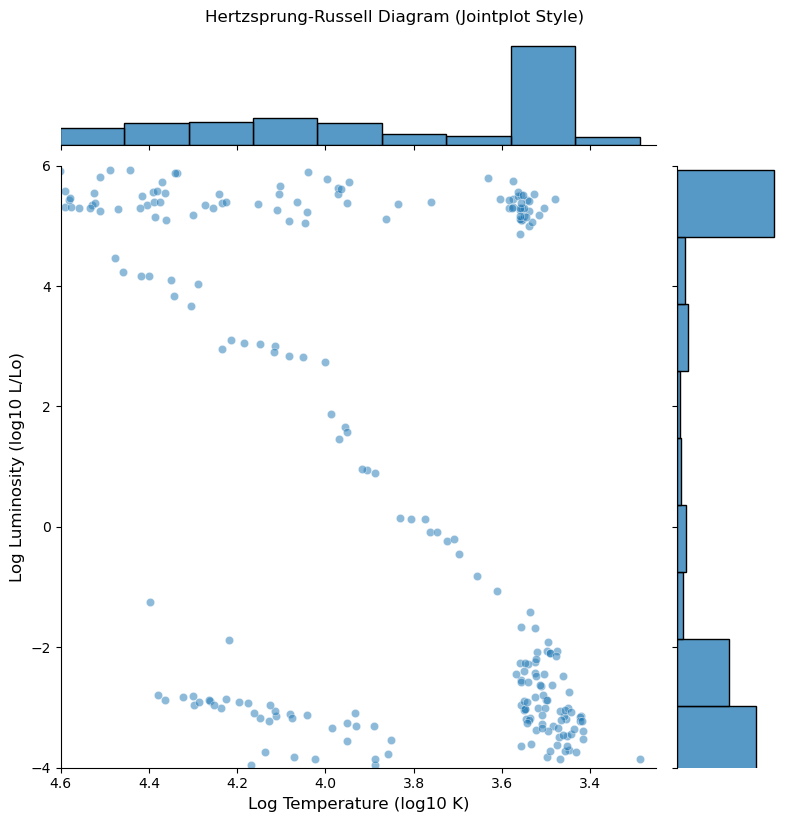

In [170]:
df["Log_Luminosity"] = np.log10(df["Luminosity(L/Lo)"])        # new column with log(Luminosity)
df["Log_Temperature"] = np.log10(df["Temperature (K)"])        # new column with log(Temperature)
plot = sns.jointplot (
    x="Log_Temperature",
    y="Log_Luminosity",
    data=df,
    alpha=0.5,
    kind="scatter",
    height=8
)
plot.ax_joint.set_ylim(-4,6)
plot.ax_joint.invert_xaxis()                                  # invert axis
plot.ax_joint.set_xlim(4.6,3.25)
plot.set_axis_labels("Log Temperature (log10 K)", "Log Luminosity (log10 L/Lo)", fontsize=12)
# plot.ax_joint.grid(True)   # sets grid
plt.suptitle("Hertzsprung-Russell Diagram (Jointplot Style)", y=1.02)
plt.show()

In [ ]:
# The log-log Hertzsprung–Russell diagram reveals clear stellar groupings, including main sequence stars, giants, and white dwarfs — demonstrating the 
#  predictive power of temperature and luminosity scaling."